In [1]:
!git clone https://github.com/89605502155/ML-repositry.git

Cloning into 'ML-repositry'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 531 (delta 14), reused 34 (delta 10), pack-reused 492
Receiving objects: 100% (531/531), 57.57 MiB | 42.78 MiB/s, done.
Resolving deltas: 100% (284/284), done.


In [2]:
!pip3 install npls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for npls: filename=npls-0.0.2-py3-none-any.whl size=15706 sha256=9116cc3fe48e3ba6f8bd99c598d8bc29b6bb3d256d4e8114b6fcd7d4be1e775d
  Stored in directory: /root/.cache/pip/wheels/f2/79/d4/fb9142af0220ae783af3181214b61ed13d8bb19a3b2029ad62
Successfully built npls


In [2]:
import numpy as np
from npls import npls
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

Take data


In [4]:
d=np.load('fluordata_2021-11-18.npz') #http://models.life.ku.dk/Fluorescence

In [6]:
d.files

['EEM', 'EEM2', 'Em', 'Ex', 'columns', 'Y']

In [4]:
h=d['Ex']
v=d['Em']

In [5]:
d['Y'].shape

(405, 6)

In [6]:
y=d['Y']

In [7]:
y*=1e6

Make Tyr Trp EEM plots

In [8]:
df1=pd.DataFrame(y,columns=['one','two','th','f','tr','ty'])
df1.head()

,one,two,th,f,tr,ty
0,87.04,0.000,0.000,0.00,0.000,0.0
1,0.00,22.378,0.000,0.00,0.000,0.0
2,0.00,0.000,5.122,0.00,0.000,0.0
3,0.00,0.000,0.000,39.96,0.000,0.0
4,0.00,0.000,0.000,0.00,7.443,0.0


In [9]:
df1.loc[100]

one     0.000000
two     0.000000
th      0.000000
f       0.000000
tr      0.000000
ty     12.273731
Name: 100, dtype: float64

In [11]:
x_tr=d['EEM2'][4,:,:]

In [10]:
x_ty=d['EEM2'][100,:,:]

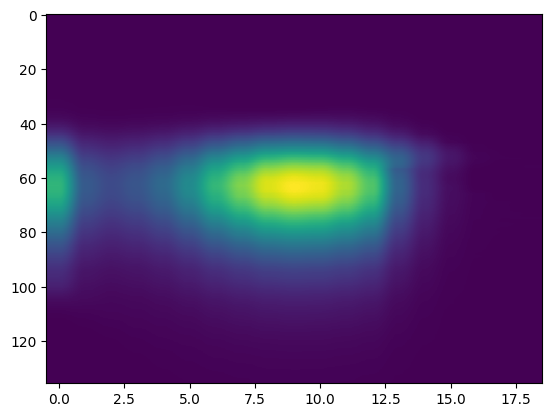

In [12]:
plt.imshow(x_tr,aspect='auto')
plt.show()

In [5]:
import matplotlib.gridspec as gridspec

/tmp/ipykernel_28516/1793356008.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=30)
/tmp/ipykernel_28516/1793356008.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=30)


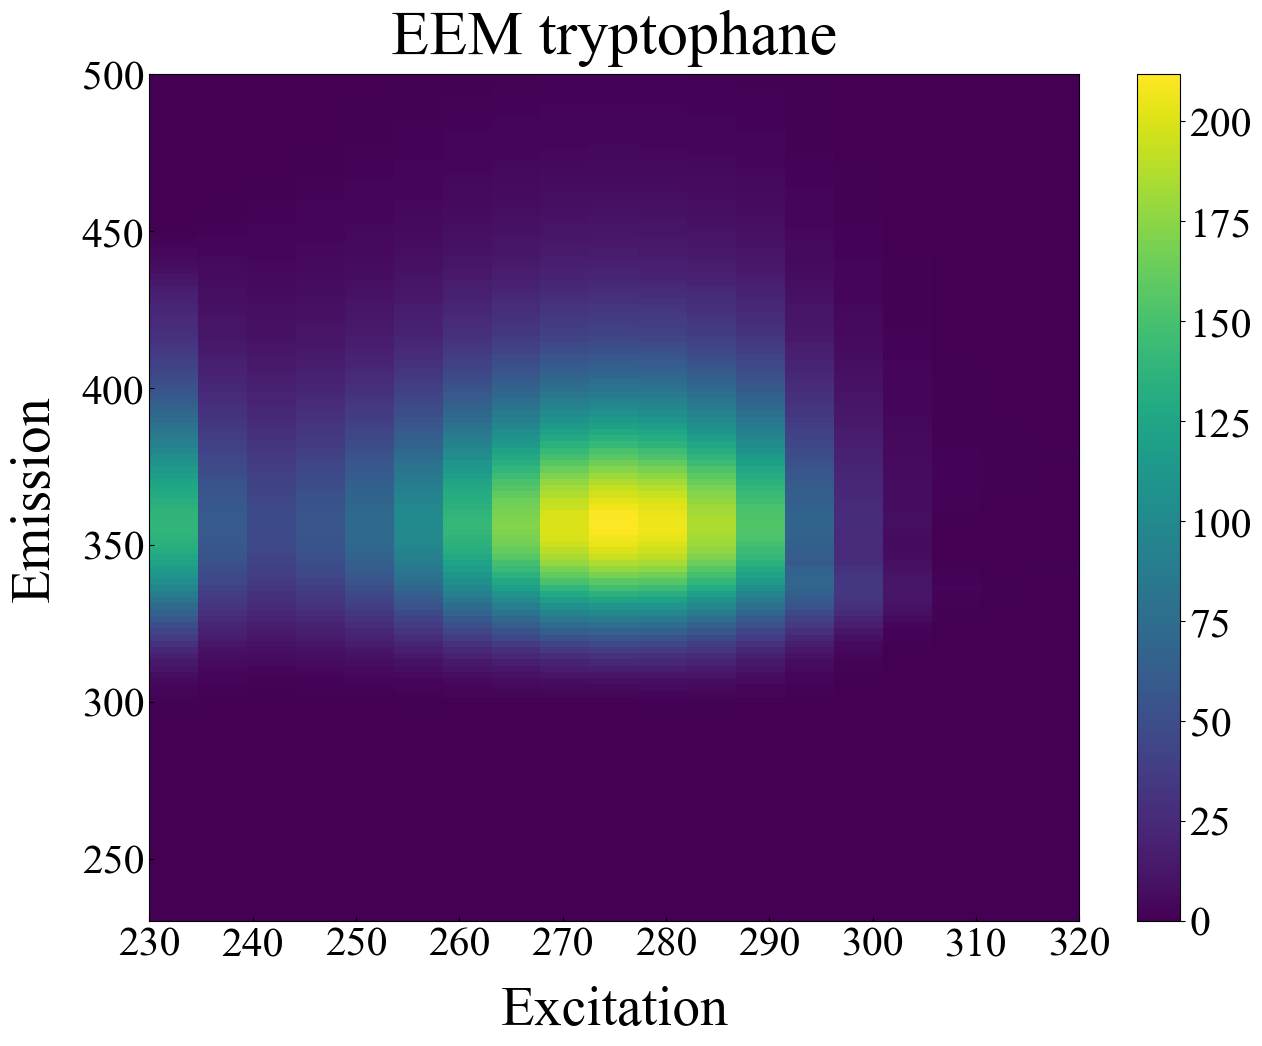

In [20]:
mpl.rc('font',family='Times New Roman')
fg = plt.figure(figsize=(15, 11),constrained_layout=False)
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)
#plt.title("Центрирование спектра образца 5",  {'fontname':'Times New Roman'}, fontsize=28,loc="center" ,pad=45)

plt.subplots_adjust(wspace=0, hspace=0)

fig_ax_1 = fg.add_subplot(gs[0])
#plt.imshow(on+tw+th+fo+trtrt,aspect="auto", origin='lower')
plt.imshow(x_tr,aspect="auto", origin='lower',extent=[h[0],h[-1],v[0],v[-1]])
plt.ylabel("Emission" , fontsize=40,labelpad=15)
plt.xlabel("Excitation",  fontsize=40,labelpad=15)
plt.title("EEM tryptophane", fontsize=45,loc="center" ,pad=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
#plt.yticks(range(240,690,50),fontsize=20)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=30)
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=30)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
#plt.xticks(indexx,lower,fontsize=20)
plt.savefig('../Work/images/PNG/fig9/EEM_Trp_Asmund.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.savefig("../Work/images/SVG/fig9/EEM_Trp_Asmund.svg", format="svg",bbox_inches='tight')

plt.show();

In [31]:
df1.loc[(df1.f==0) & (df1.one==0) & (df1.two==0) & (df1.ty>0)]

,one,two,th,f,tr,ty
5,0.0,0.0,0.000000,0.0,0.000000,12.141000
13,0.0,0.0,0.000000,0.0,0.000000,12.141000
34,0.0,0.0,0.000000,0.0,0.000000,12.141000
41,0.0,0.0,0.000000,0.0,0.000000,12.097130
51,0.0,0.0,0.000000,0.0,0.000000,12.097130
53,0.0,0.0,0.000000,0.0,0.000000,12.097130
58,0.0,0.0,0.000000,0.0,0.000000,12.008830
70,0.0,0.0,0.000000,0.0,0.000000,12.008830
72,0.0,0.0,0.000000,0.0,0.000000,12.008830
74,0.0,0.0,0.000000,0.0,0.000000,12.008830


In [ ]:
plt.imshow(d['EEM2'][0,:,:],aspect='auto')
plt.show()

NameError: ignored

In [ ]:
def flatten(x):
    sh = x.shape
    return x.reshape(sh[0:len(sh)-1])

Centering fluordata

In [24]:
X=d['EEM2'][:,:,3:]
y=d['Y']
y_pred=list()

In [25]:
X -= X.mean(axis = 0)

In [26]:
y_mean=list()

In [27]:
yyy=y.copy()

In [28]:
for i in range(6):
  print(i)
  y[:,i]*=1e6
  aaa=y[:,i].mean()
  y_mean.append(aaa)
  y[:,i]-=aaa

0
1
2
3
4
5


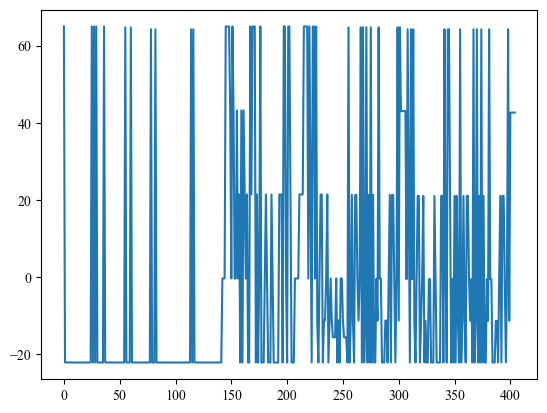

In [29]:
plt.plot(y[:,0])
plt.show()

In [30]:
resoult=list()

In [31]:
for i in range(6):
  print(i)
  X_train, X_test, y_train, y_test = train_test_split(
    X, y[:,i], test_size=0.1428, random_state=42)
  npls1=npls()
  scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
  parametrsNames={'n_components': range(20),
                  # 'a': np.logspace(-2, 0,num = 2)}
                  'a':[0.3]}
  
  gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,
                          refit='r2', return_train_score=True)
  gridCought.fit(X_train, y_train)
  r2_p=gridCought.score(X_test, y_test)
  mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
  mse_c=gridCought.cv_results_[ "mean_train_mse" ]
  r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
  r2_c=gridCought.cv_results_[ "mean_train_r2" ]
  resoult.append([gridCought.cv_results_,gridCought.best_params_])
  plt.plot(r2_p,".",color='green')
  plt.plot(r2_c,".",color='blue')
  plt.plot(r2_cv,".",color='red')
  plt.show()

  predictors=gridCought.predict(X)
  y_pred.append(predictors)


0


In [ ]:
resoult[0][0][ "mean_test_r2" ],resoult[0][0][ "mean_test_mse" ]

(array([-0.02156319,  0.19299954,  0.61693392,  0.63229673,  0.78580625,
         0.97373757,  0.98084124,  0.98292533,  0.98501513,  0.98717176,
         0.98849296,  0.99077588,  0.99102092,  0.99196612,  0.9926586 ,
         0.99328615,  0.99349844,  0.99365518,  0.99383664,  0.99384222]),
 array([890.00219063, 696.68943135, 322.7305315 , 309.03813706,
        183.22354893,  22.873402  ,  16.82908161,  14.91082784,
         13.06152116,  11.16020078,   9.97601532,   8.05748764,
          7.80705749,   6.87824392,   6.23688534,   5.75964716,
          5.55880724,   5.43121688,   5.20482757,   5.19247842]))

In [ ]:
resoult[5][1]

{'a': 1, 'n_components': 14}

In [ ]:
n_com=[18,14,14,18,15,13]

In [ ]:
for i in range(6):
  y_pred[i]+=y_mean[i]
  y[:,i]+=y_mean[i]

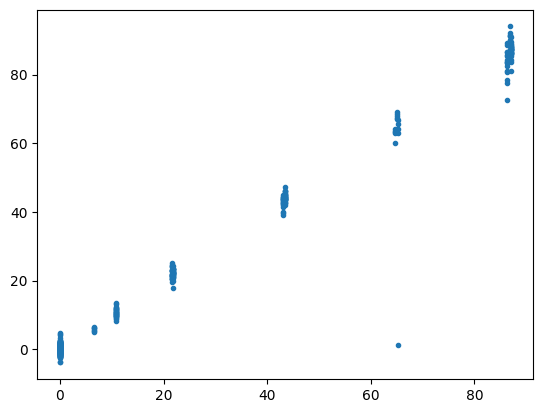

In [ ]:
plt.plot(y[:,0],y_pred[0],".")
plt.show()

In [6]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error

/tmp/ipykernel_32850/3726587880.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
/tmp/ipykernel_32850/3726587880.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
/tmp/ipykernel_32850/3726587880.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
/tmp/ipykernel_32850/3726587880.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
/tmp/ipykernel_32850/3726587880.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
/tmp/ipykernel_32850/3726587880.py:78: UserWarning: Fix

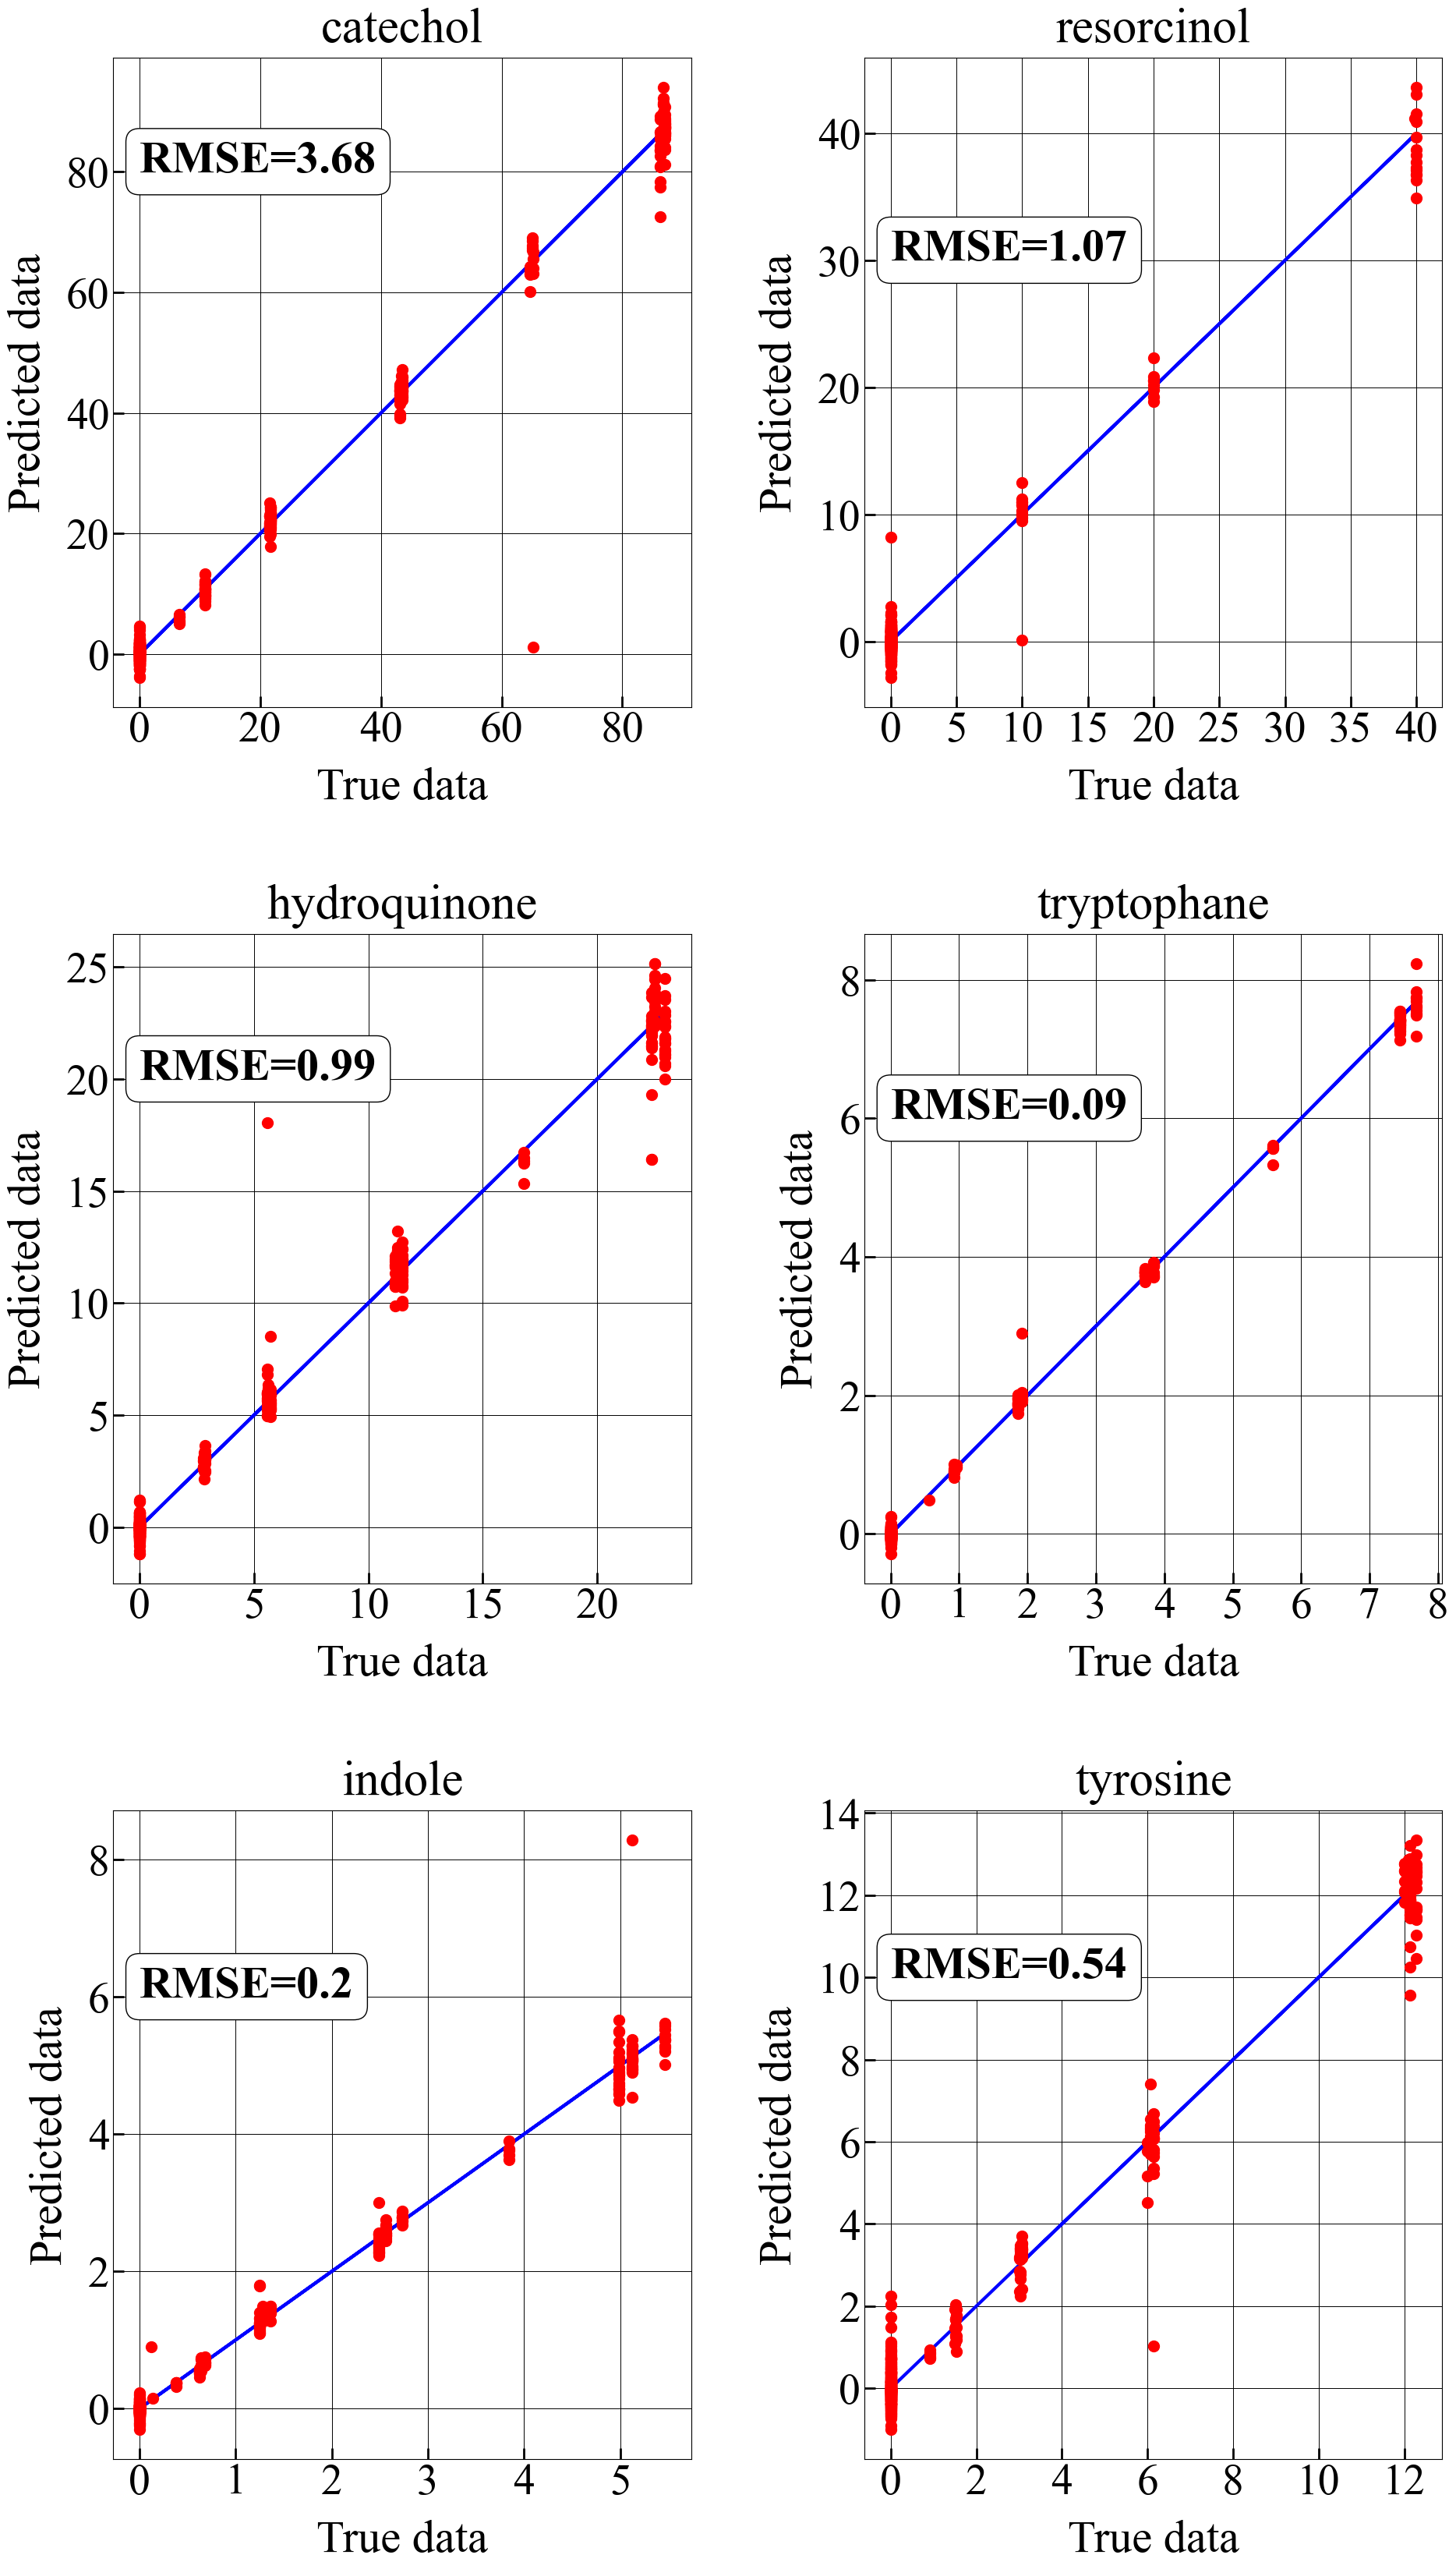

In [12]:
j=0
titLabFont=45
axLabFont=40
axNameLabFont=42
textFontSize=42
numRound=2
mpl.rc('font',family='Times New Roman')
fg = plt.figure(figsize=(22, 40),constrained_layout=False)
gs = gridspec.GridSpec(ncols=2, nrows=3, figure=fg)

plt.subplots_adjust(wspace=0.3, hspace=0.35)
# plt.subplots_adjust(hspace=0.3)

fig_ax_1 = fg.add_subplot(gs[0,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("catechol", fontsize=titLabFont,loc="center" ,
                   pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,80,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("hydroquinone", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,20,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[2,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("indole", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,6,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[0,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("resorcinol", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,30,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("tryptophane", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,6,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[2,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("tyrosine", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,10,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1
plt.savefig('../Work/images/SVG/fig7/Asmund_true_two_pr_plots_short.svg',format='svg',bbox_inches='tight')
plt.savefig('../Work/images/PNG/fig7/Asmund_true_two_pr_plots_short.pdf',format='pdf',dpi=300,bbox_inches='tight')
plt.show();

In [ ]:
np.savez('asmund_pr_plot',y=y,y_pred=y_pred,resoult=resoult,n_com=n_com)

NameError: ignored

In [7]:
d=np.load('../Work/images/SVG/fig7/asmund_pr_plot.npz')

In [8]:
y=d['y']
y_pred=d['y_pred']
# resoult=d['resoult']
n_com=d['n_com']